### Import all Necessary Libaray

In [1]:
import numpy as np
import pandas as pd 
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
import matplotlib.pyplot as plt

In [2]:
from tensorflow import keras
from tensorflow.keras import layers
from keras.models import load_model
import tensorflow as tf

### Read the dataset from the package

In [3]:
from tensorflow.keras.datasets import mnist

### Load the dataset into train and testing parts 

In [4]:
(x_train, y_train), (x_test, y_test) = mnist.load_data()


11490434/11490434 [==============================] - 3s 0us/step


### View the dimensions of training and testing datasets

In [5]:
print('X Training shape: ',x_train.shape)
print('Y Training shape: ',y_train.shape)
print('X Testing shape: ',x_test.shape)
print('Y Testing shape: ',y_test.shape)

X Training shape:  (60000, 28, 28)
Y Training shape:  (60000,)
X Testing shape:  (10000, 28, 28)
Y Testing shape:  (10000,)


### The dataset contains 60000 training samples and 10000 samples with 28 of width and dimensions

In [6]:
x_train

array([[[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]],

       [[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]],

       [[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]],

       ...,

       [[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]],

       [[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 

### Show any input image in train dataset then show its corresponding numeric values

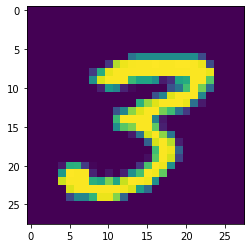

Digit in image is  3


In [8]:
plt.imshow(x_train[203])
plt.show()
print("Digit in image is ",y_train[203])

### View shape of above image 

In [9]:
x_train[203].shape

(28, 28)

### Reshaping the images in training and testing datasets

In [10]:
input_shape = (28,28,1)

In [11]:
x_train = x_train.reshape(x_train.shape[0],28,28,1)
x_test = x_test.reshape(x_test.shape[0],28,28,1)
x_train.shape,x_test.shape

((60000, 28, 28, 1), (10000, 28, 28, 1))

Above images are reshape according to number of samples in dataset, width,height and number of channels
- here we have 60000 samples in training dataset and 10000 samples in testing dataset

### Normalize the images to scale the pixels between 0 and 1

In [12]:
x_train = x_train.astype("float32") / 255
x_test = x_test.astype("float32") / 255

x_train[41]

array([[[0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ]],

       [[0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        

### Encoding Taget Categorical variable into numberical variables

In [13]:
y_train = keras.utils.to_categorical(y_train, 10)
y_test = keras.utils.to_categorical(y_test, 10)

Target categorical variables are encoded into 10 number of classes

In [14]:
### Creating CNN Model 

In [15]:
model = keras.Sequential(
    [
        keras.Input(shape=input_shape),
        layers.Conv2D(32, kernel_size=(3, 3), activation="relu"),
        layers.MaxPooling2D(pool_size=(2, 2)),
        layers.Conv2D(64, kernel_size=(3, 3), activation="relu"),
        layers.MaxPooling2D(pool_size=(2, 2)),
        layers.Flatten(),
        layers.Dropout(0.5),
        layers.Dense(10, activation="softmax"),
    ]
)


### Print the summary of the model

In [16]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 26, 26, 32)        320       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 13, 13, 32)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 11, 11, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 5, 5, 64)         0         
 2D)                                                             
                                                                 
 flatten (Flatten)           (None, 1600)              0         
                                                                 
 dropout (Dropout)           (None, 1600)              0

### Compile the model

In [17]:
model.compile(optimizer="adam",loss="categorical_crossentropy",  metrics=["accuracy"])

In [ ]:
### Train the model

In [ ]:
history = model.fit(x_train, y_train, batch_size=120, epochs=5, validation_split=0.1)

Epoch 1/5
450/450 [==============================] - 43s 94ms/step - loss: 0.3633 - accuracy: 0.8895 - val_loss: 0.0818 - val_accuracy: 0.9778
Epoch 2/5
450/450 [==============================] - 41s 92ms/step - loss: 0.1146 - accuracy: 0.9640 - val_loss: 0.0570 - val_accuracy: 0.9850
Epoch 3/5
450/450 [==============================] - 41s 92ms/step - loss: 0.0853 - accuracy: 0.9745 - val_loss: 0.0505 - val_accuracy: 0.9870
Epoch 4/5
450/450 [==============================] - 41s 91ms/step - loss: 0.0711 - accuracy: 0.9779 - val_loss: 0.0417 - val_accuracy: 0.9883
Epoch 5/5
450/450 [==============================] - 47s 103ms/step - loss: 0.0625 - accuracy: 0.9808 - val_loss: 0.0385 - val_accuracy: 0.9893


Highest validation accuracy is shown  by 5th epose is 98%

In [ ]:
print(history.history)

{'loss': [0.36330464482307434, 0.11463575065135956, 0.0853058323264122, 0.07112766057252884, 0.06246292218565941], 'accuracy': [0.8895370364189148, 0.963962972164154, 0.9745000004768372, 0.9778518676757812, 0.9808148145675659], 'val_loss': [0.0818307027220726, 0.0570257268846035, 0.050483595579862595, 0.04173797741532326, 0.03850489854812622], 'val_accuracy': [0.9778333306312561, 0.9850000143051147, 0.9869999885559082, 0.9883333444595337, 0.9893333315849304]}


In [ ]:
train_loss, train_acc = model.evaluate(x_train, y_train)
test_loss, test_acc = model.evaluate(x_test, y_test)

313/313 [==============================] - 3s 10ms/step - loss: 0.0346 - accuracy: 0.9874


In [ ]:
model2 = keras.Sequential(
    [
        keras.Input(shape=input_shape),
        layers.Conv2D(32, kernel_size=(3,3), activation="relu"),
        layers.Conv2D(64, kernel_size=(3, 3), activation="relu"),
        layers.GlobalAveragePooling2D(),
        layers.Flatten(),
        layers.Dropout(0.5),
        layers.Dense(10, activation="softmax"),
    ]
)

In [ ]:
model2.summary()  

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_2 (Conv2D)           (None, 26, 26, 32)        320       
                                                                 
 conv2d_3 (Conv2D)           (None, 24, 24, 64)        18496     
                                                                 
 global_average_pooling2d (G  (None, 64)               0         
 lobalAveragePooling2D)                                          
                                                                 
 flatten_1 (Flatten)         (None, 64)                0         
                                                                 
 dropout_1 (Dropout)         (None, 64)                0         
                                                                 
 dense_1 (Dense)             (None, 10)                650       
                                                      

In [ ]:
model2.compile(loss="categorical_crossentropy",  metrics=["accuracy"])

In [ ]:
history = model2.fit(x_train, y_train, batch_size=120, epochs=5, validation_split=0.3)

Epoch 1/5
350/350 [==============================] - 89s 251ms/step - loss: 2.1019 - accuracy: 0.2221 - val_loss: 1.8186 - val_accuracy: 0.3509
Epoch 2/5
350/350 [==============================] - 90s 258ms/step - loss: 1.8354 - accuracy: 0.3075 - val_loss: 1.6344 - val_accuracy: 0.4397
Epoch 3/5
350/350 [==============================] - 90s 259ms/step - loss: 1.7167 - accuracy: 0.3465 - val_loss: 1.5455 - val_accuracy: 0.4818
Epoch 4/5
350/350 [==============================] - 89s 254ms/step - loss: 1.6369 - accuracy: 0.3860 - val_loss: 1.4701 - val_accuracy: 0.5339
Epoch 5/5
350/350 [==============================] - 90s 257ms/step - loss: 1.5730 - accuracy: 0.4174 - val_loss: 1.3949 - val_accuracy: 0.5898


In [ ]:
model2.compile(optimizer="adam",loss="categorical_crossentropy",  metrics=["accuracy"])

In [ ]:
history = model2.fit(x_train, y_train, batch_size=120, epochs=5, validation_split=0.5)

Epoch 1/5
250/250 [==============================] - 66s 264ms/step - loss: 1.4010 - accuracy: 0.4960 - val_loss: 1.2018 - val_accuracy: 0.6604
Epoch 2/5
250/250 [==============================] - 66s 263ms/step - loss: 1.3691 - accuracy: 0.5076 - val_loss: 1.1461 - val_accuracy: 0.6874
Epoch 3/5
250/250 [==============================] - 65s 262ms/step - loss: 1.3307 - accuracy: 0.5262 - val_loss: 1.1142 - val_accuracy: 0.6810
Epoch 4/5
250/250 [==============================] - 66s 264ms/step - loss: 1.3023 - accuracy: 0.5382 - val_loss: 1.0700 - val_accuracy: 0.7163
Epoch 5/5
250/250 [==============================] - 65s 262ms/step - loss: 1.2641 - accuracy: 0.5580 - val_loss: 1.0323 - val_accuracy: 0.7348


In [ ]:
history = model2.fit(x_train, y_train, batch_size=120, epochs=5, validation_split=0.6)

Epoch 1/5
200/200 [==============================] - 63s 314ms/step - loss: 1.2318 - accuracy: 0.5692 - val_loss: 1.0140 - val_accuracy: 0.7502
Epoch 2/5
200/200 [==============================] - 63s 316ms/step - loss: 1.2042 - accuracy: 0.5796 - val_loss: 0.9681 - val_accuracy: 0.7510
Epoch 3/5
200/200 [==============================] - 62s 312ms/step - loss: 1.1832 - accuracy: 0.5908 - val_loss: 0.9476 - val_accuracy: 0.7571
Epoch 4/5
200/200 [==============================] - 62s 313ms/step - loss: 1.1466 - accuracy: 0.6041 - val_loss: 0.9092 - val_accuracy: 0.7717
Epoch 5/5
200/200 [==============================] - 63s 318ms/step - loss: 1.1315 - accuracy: 0.6085 - val_loss: 0.8955 - val_accuracy: 0.7615
